# SVM classifier and the breast_cancer_Wisconsin dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
dat = pd.read_csv("breast_cancer_wisconsin.csv")

In [3]:
dat.head() # to explore the first five rows of the dataset

,%id,diagnosis (M=malignant; B=benign),radius (nucA),texture (nucA),perimeter (nucA),area (nucA),smoothness (nucA),compactness (nucA),concavity (nucA),concave points (nucA),...,radius (nucC),texture (nucC),perimeter (nucC),area (nucC),smoothness (nucC),compactness (nucC),concavity (nucC),concave points (nucC),symmetry (nucC),fractal dimension (nucC)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Drop the %id column 

dat = dat.drop(columns = ["%id"])

In [5]:
print("# of data =", dat.shape[0]) # nr of rows = nr of data in our case
print("# of features =", dat.shape[1]-1) # nr of features = nr of columns - nr of targets (1 column)

# of data = 569
# of features = 30


In [7]:
targets = dat.iloc[:,0]
features = dat.iloc[:,1:32]

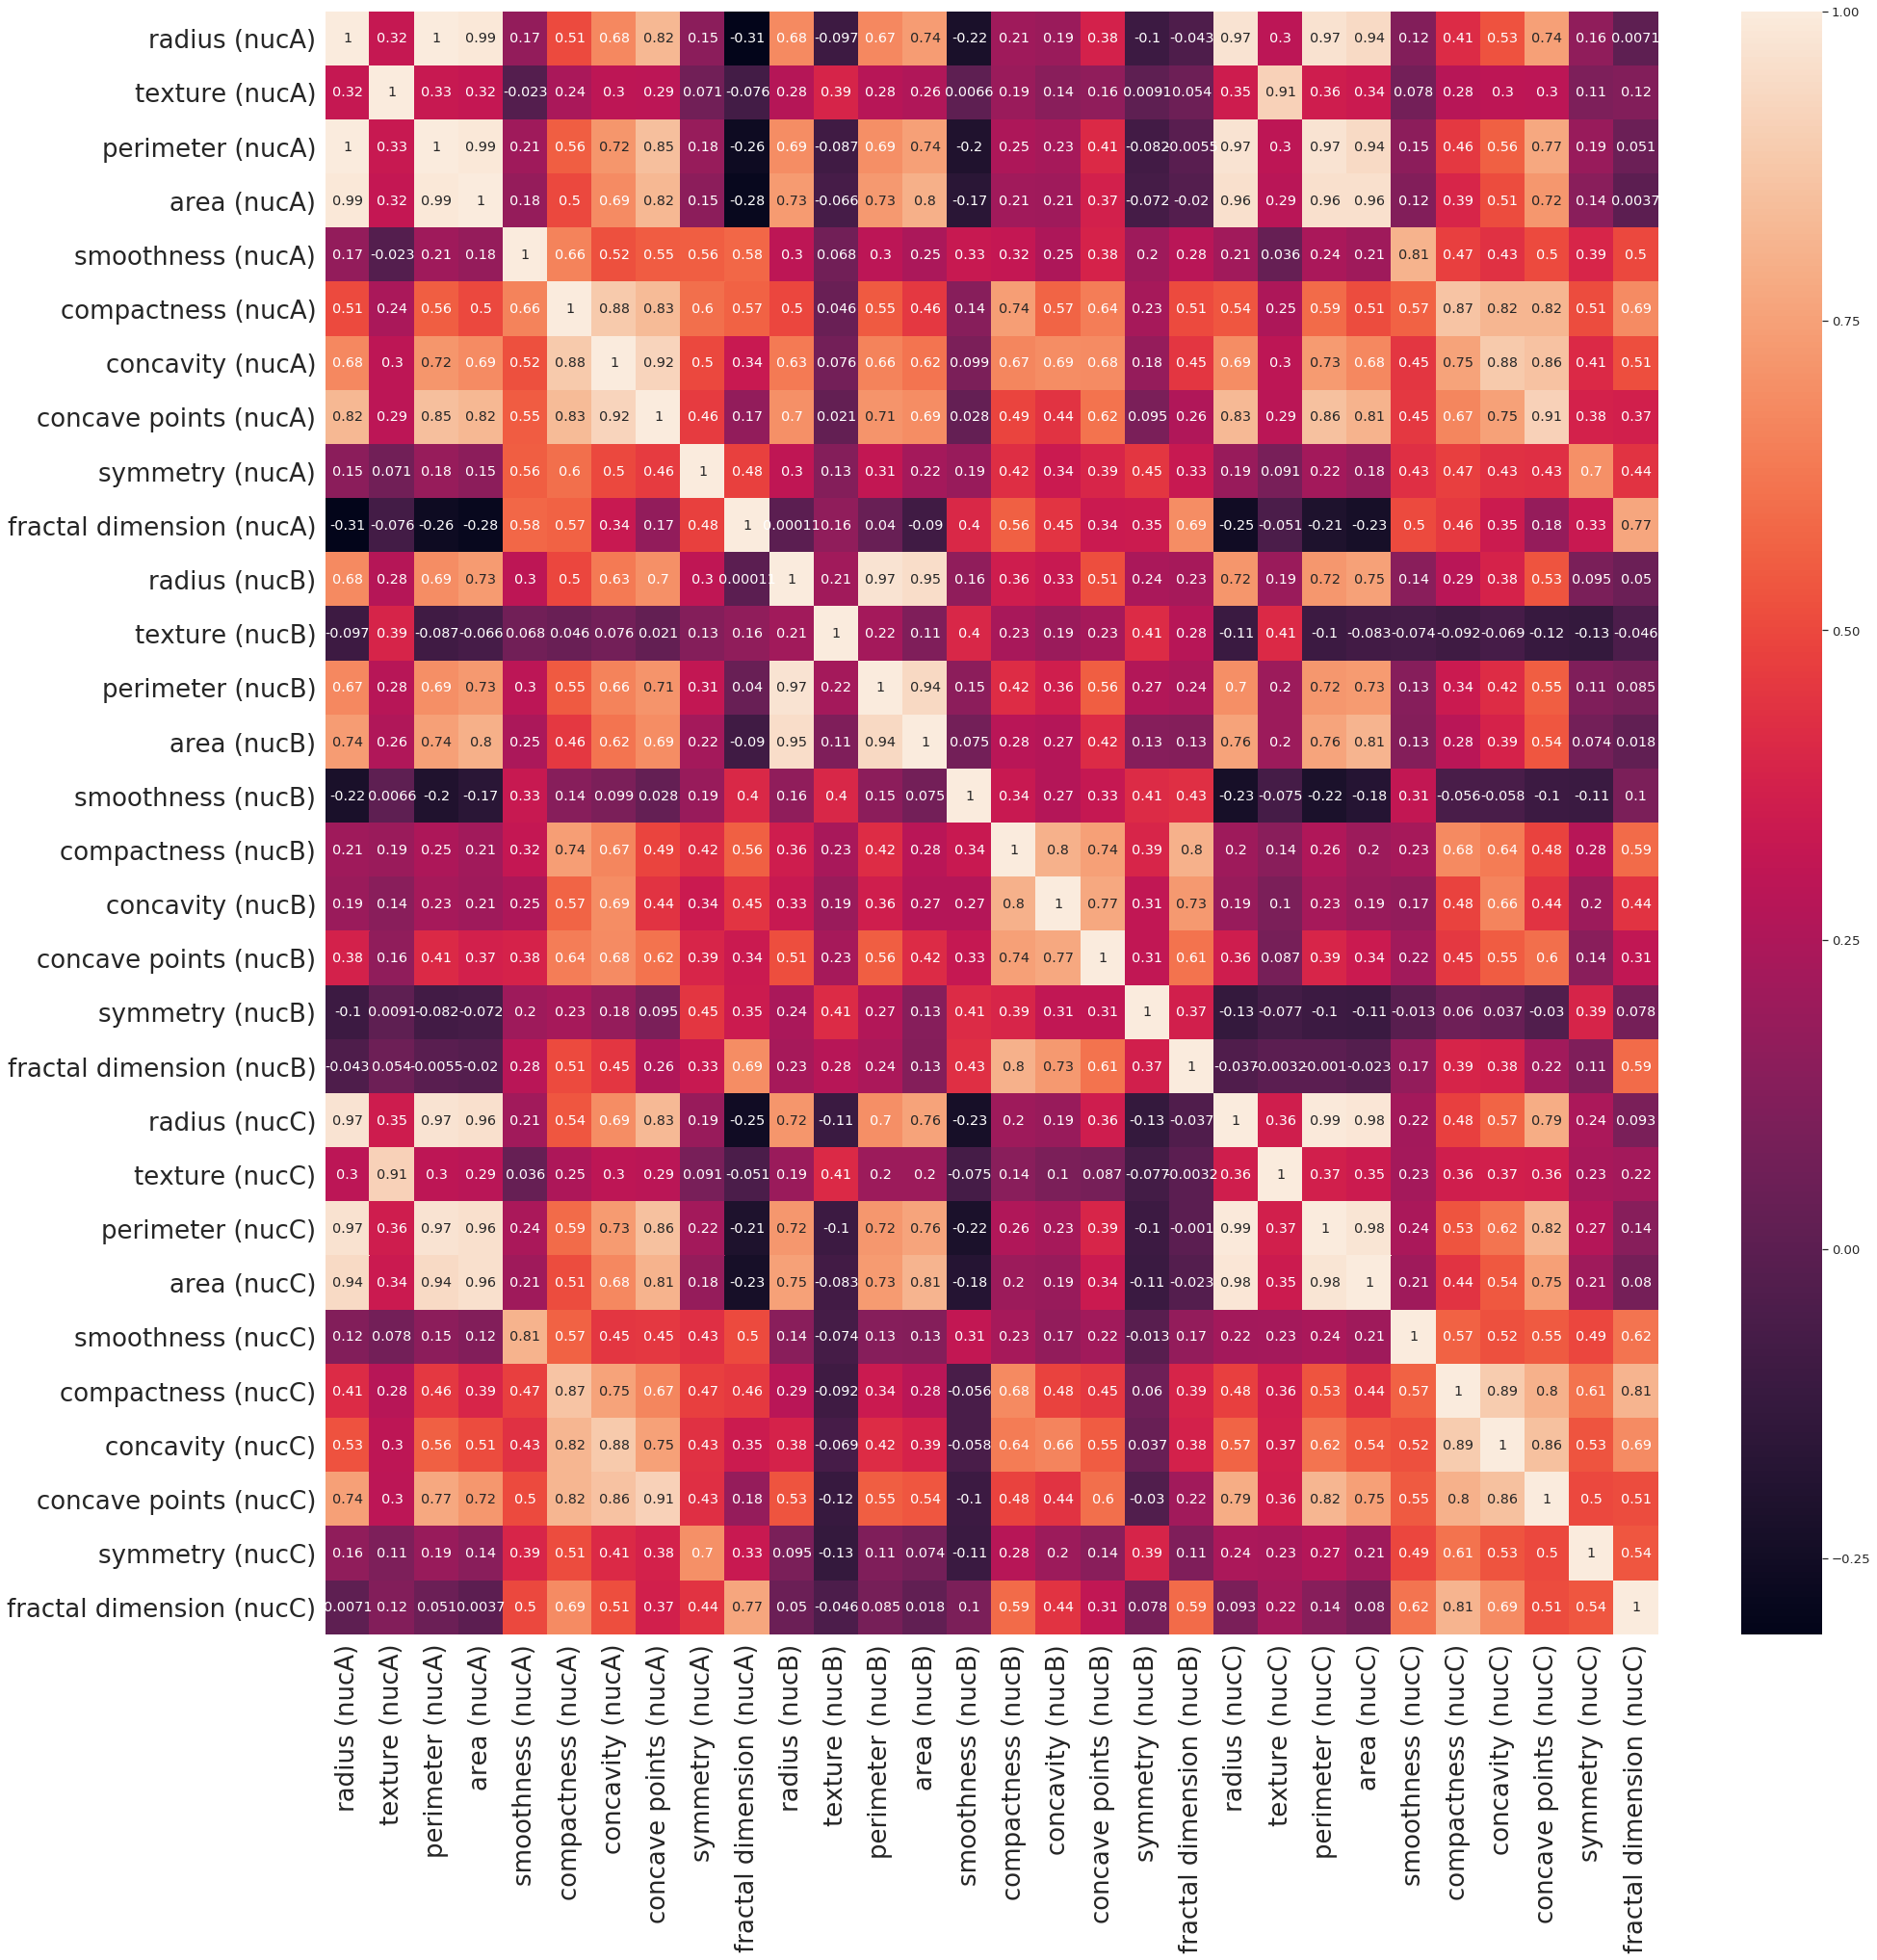

In [8]:
import seaborn as sns

plt.figure(figsize = (31,31))
sns.set(font_scale = 1.2)
sns.heatmap(dat.corr(method = "pearson"), annot = True)
plt.tick_params(labelsize=26)
plt.show()

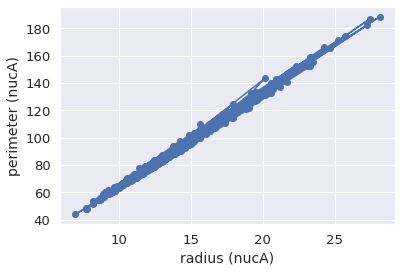

m =  6.880400285260426 , q =  -5.232388721515679


In [9]:
# Fit two sets of data well-correlated and get slope + intercept of the linear fit

def line(x,m,q):
    return m*x+q

popt, pcov = opt.curve_fit(line, features["radius (nucA)"], features["perimeter (nucA)"])
plt.plot(features["radius (nucA)"], features["perimeter (nucA)"], marker = "o")
plt.xlabel("radius (nucA)", fontsize = 14)
plt.ylabel("perimeter (nucA)", fontsize = 14)
plt.show()

print("m = ", popt[0], ", q = ", popt[1]) # find the slope and the y-intercept of the line used to fit the data

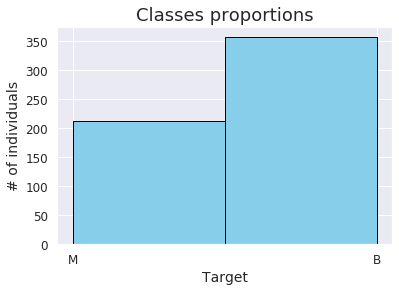

Malignant proportion: 37.0 %
Benign proportion: 63.0 %


In [10]:
# histogram to represent the proportions of data in the two classes "M" and "B"

num_bins = 2
n, bins, patches = plt.hist(targets, num_bins, color="skyblue",edgecolor="black")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Classes proportions", fontsize = 18)
plt.xlabel("Target", fontsize = 14)
plt.ylabel("# of individuals", fontsize = 14)

plt.show()

# Get the proportions of the two classes

nr_M = dat.loc[dat["diagnosis (M=malignant; B=benign)"] == "M"].shape[0]
nr_B = dat.loc[dat["diagnosis (M=malignant; B=benign)"] == "B"].shape[0]

print("Malignant proportion: {} %".format(round(100*nr_M/dat.shape[0],0)))
print("Benign proportion: {} %".format(round(100*nr_B/dat.shape[0],0)))

The two classes are not perfectly balanced. This may give issues when training a binary classifier, because it can be sensitive to the presence of imbalanced classes. Therefore, it will be instructive to compute a confusion matrix and to check the F-measure as well.

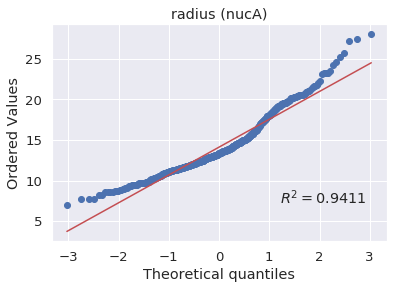

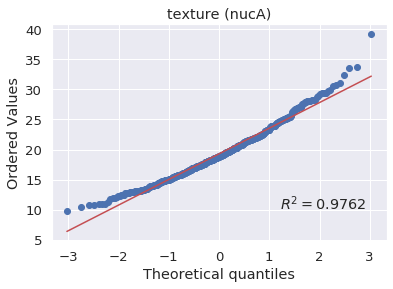

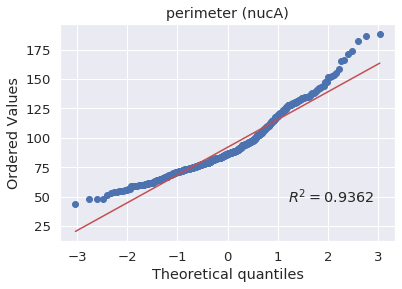

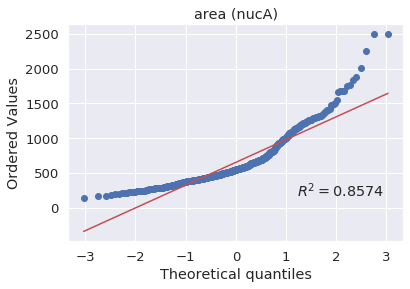

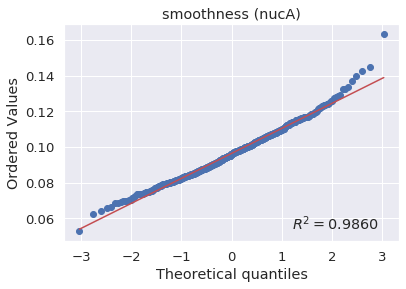

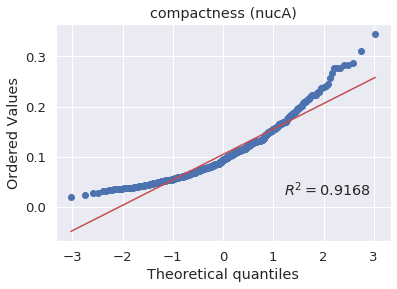

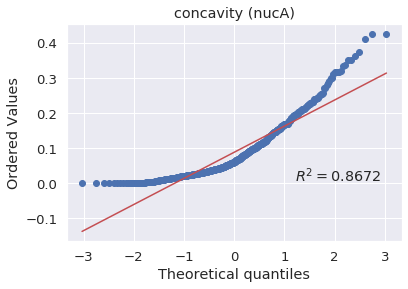

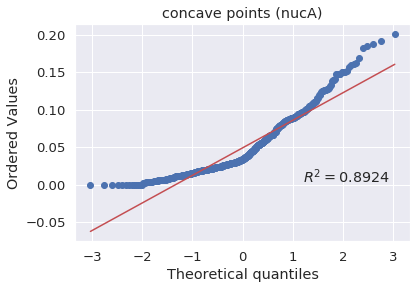

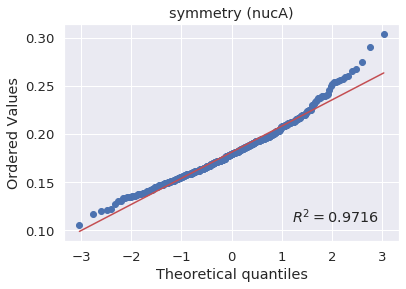

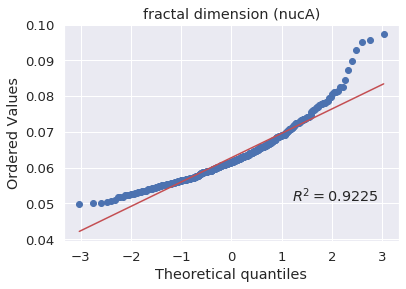

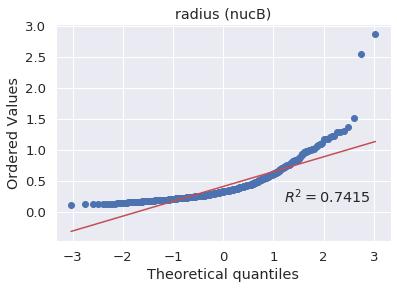

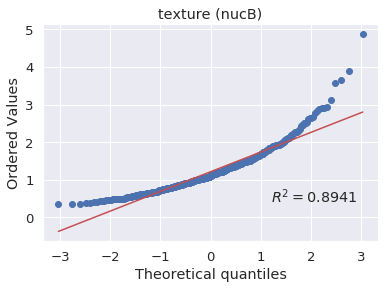

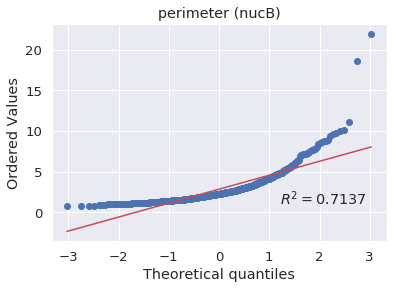

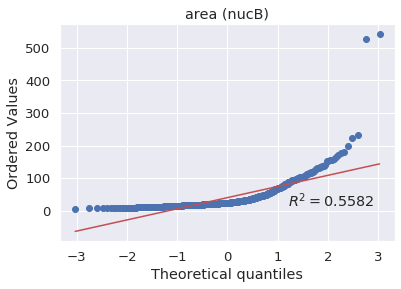

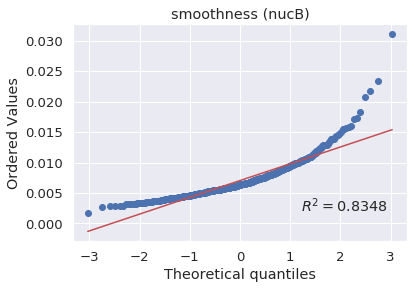

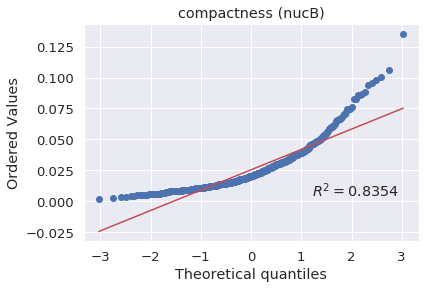

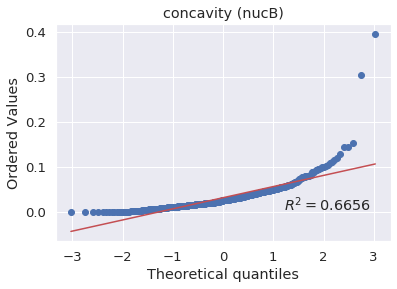

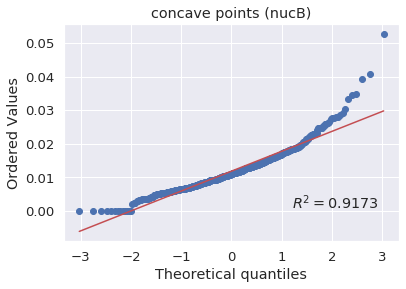

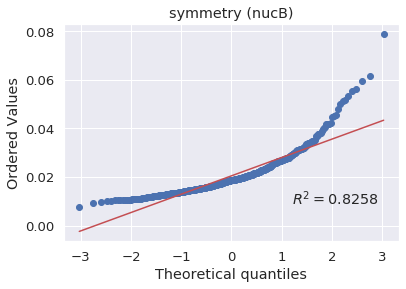

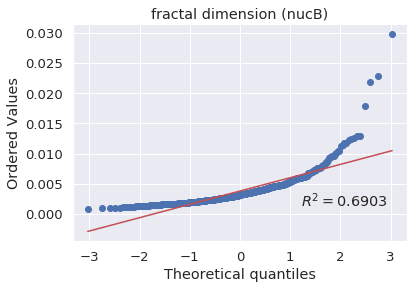

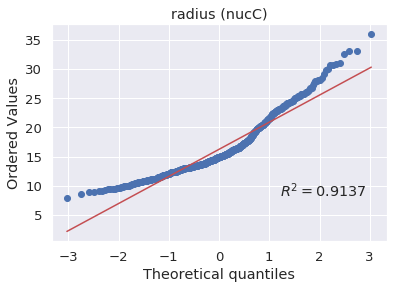

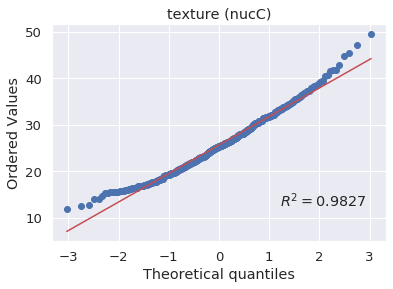

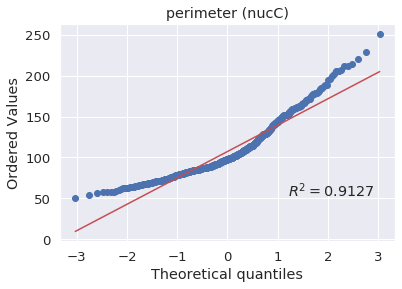

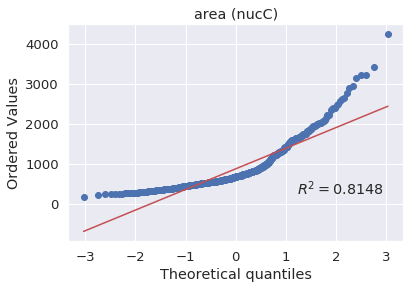

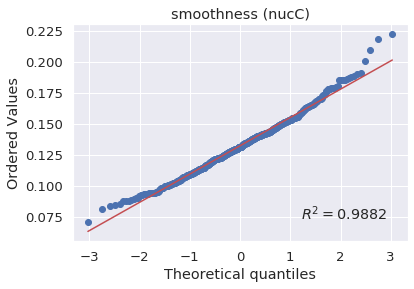

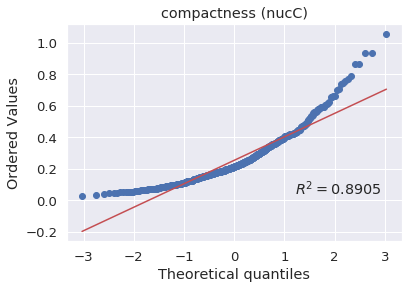

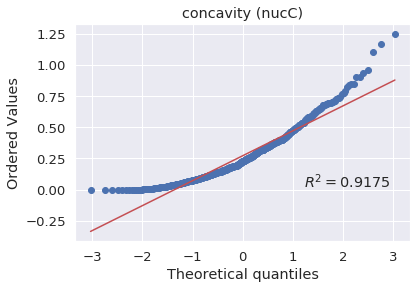

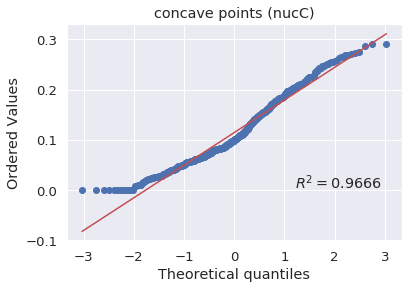

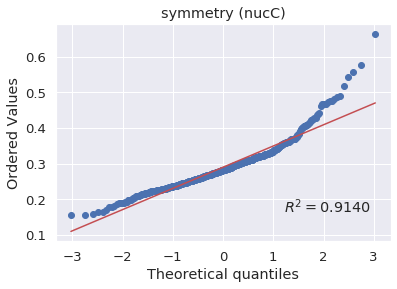

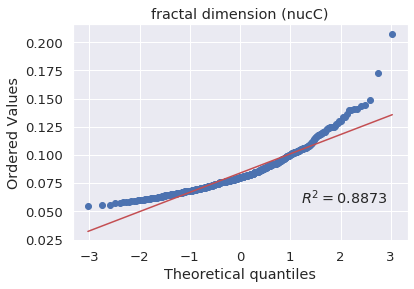

In [11]:
# Check whether there is normally distributed data

import scipy.stats as stats

for i in range(30):
    stats.probplot(features[features.columns[i]], dist="norm", plot=plt, rvalue=True)
    plt.title(features.columns[i])
    plt.show()

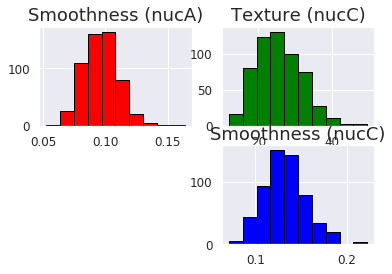

In [12]:
# Only in three cases we have a correlation coefficient high enough to approximate the data normally

plt.subplot(221)
n, bins, patches = plt.hist(features["smoothness (nucA)"], color="red", edgecolor="black")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Smoothness (nucA)", fontsize = 18)

plt.subplot(222)
n, bins, patches = plt.hist(features["texture (nucC)"], color="green", edgecolor="black")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Texture (nucC)", fontsize = 18)

plt.subplot(224)
n, bins, patches = plt.hist(features["smoothness (nucC)"], color="blue", edgecolor="black")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Smoothness (nucC)", fontsize = 18)

plt.show()

In [13]:
# Print the normalized variance

print(round(features.var(),2)) # print the variance of each feature

radius (nucA)                   12.42
texture (nucA)                  18.50
perimeter (nucA)               590.44
area (nucA)                 123843.55
smoothness (nucA)                0.00
compactness (nucA)               0.00
concavity (nucA)                 0.01
concave points (nucA)            0.00
symmetry (nucA)                  0.00
fractal dimension (nucA)         0.00
radius (nucB)                    0.08
texture (nucB)                   0.30
perimeter (nucB)                 4.09
area (nucB)                   2069.43
smoothness (nucB)                0.00
compactness (nucB)               0.00
concavity (nucB)                 0.00
concave points (nucB)            0.00
symmetry (nucB)                  0.00
fractal dimension (nucB)         0.00
radius (nucC)                   23.36
texture (nucC)                  37.78
perimeter (nucC)              1129.13
area (nucC)                 324167.39
smoothness (nucC)                0.00
compactness (nucC)               0.02
concavity (n

In [14]:
# Guess: since the data has got many features and most of them have a zero variance, 
# we shall try out a principal component analysis in perform a dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(features)

for i in range(10): 
    print("Variance of the ", i+1 ,"component: %s "%(round(100*pca.explained_variance_ratio_[i],1)))

Variance of the  1 component: 98.2 
Variance of the  2 component: 1.6 
Variance of the  3 component: 0.2 
Variance of the  4 component: 0.0 
Variance of the  5 component: 0.0 
Variance of the  6 component: 0.0 
Variance of the  7 component: 0.0 
Variance of the  8 component: 0.0 
Variance of the  9 component: 0.0 
Variance of the  10 component: 0.0 


In [15]:
# The first two components enclose between 99 % and 100 % of the variance. 
# Therefore, we shall retain them 

pca2 = PCA(n_components = 2)
red_features = pca2.fit_transform(features)

In [32]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 1e+2, 1e+3, 1e+4, 1e+5]
    gammas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e+1,1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    pred_targets = grid_search.predict(X)
    return (grid_search.best_params_, round(grid_search.best_score_,2), confusion_matrix(y, pred_targets),
           f1_score(y, pred_targets, average = "micro"))

In [33]:
print("Parameters of the best model: {}".format(svc_param_selection(features, targets, 10)[0]))
print("Mean accuracy of the best model: {} %".format(svc_param_selection(features, targets, 10)[1]*100))
print("Confusion matrix: {}".format(svc_param_selection(features, targets, 10)[2]))
print("F-measure: {}".format(svc_param_selection(features, targets, 10)[3]))

Parameters of the best model: {'C': 10000.0, 'gamma': 1e-05}
Mean accuracy of the best model: 96.0 %
Confusion matrix: [[354   3]
 [  6 206]]
F-measure: 0.984182776801406


### Conclusions 
The previous model has reached a mean classification accuracy of about 96% using cross validation on 10 different folds. On average, the numbers of FP and FN in the confusion matrix are lower than the numbers of TP and TN by two orders of magnitude. At the same time, the F-measure score is close to 1. Therefore, we can conclude that, even though the two classes "malignant" and "benign" are slightly imbalanced in the dataset, this fact does not affect the performance of the previous SVM model.  